<a href="https://colab.research.google.com/github/brunogtds/pyact/blob/main/pyact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*comandos úteis*

ctrl + enter = roda a célula em foco

ctrl + F9 = roda todas células

ctrl + / = comenta tudo selecionado

ctrl + m + b = nova célula código

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

#!pip install --target=$nb_path pyActigraphy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#sys.path

In [ ]:
pip install pyActigraphy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import pyActigraphy
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [ ]:
import os
fpath = os.path.join(os.path.dirname(pyActigraphy.__file__),'tests/data/')

raw = pyActigraphy.io.read_raw_awd(fpath+'example_01.AWD', header_size=7)
raw_allfiles = pyActigraphy.io.read_raw(fpath+'example_0*.AWD', reader_type='AWD') #importa todos os 6 exemplos disponíveis

In [ ]:
len(raw_allfiles.readers)

6

In [ ]:
help(raw)

Help on RawAWD in module pyActigraphy.io.awd.awd object:

class RawAWD(pyActigraphy.io.base.BaseRaw)
 |  RawAWD(input_fname, header_size=7, frequency=None, start_time=None, period=None, engine='python')
 |  
 |  Raw object from .AWD file (recorded by ActiWatches)
 |  
 |  Parameters
 |  ----------
 |  input_fname: str
 |      Path to the AWD file.
 |  header_size: int, optional
 |      Header size (i.e. number of lines) of the raw data file. Default is 7.
 |  frequency: str, optional
 |      Data acquisition frequency to use if it cannot be infered from the
 |      header. Cf. #timeseries-offset-aliases in
 |      <https://pandas.pydata.org/pandas-docs/stable/timeseries.html>.
 |      Default is None.
 |  start_time: datetime-like, optional
 |      Read data from this time.
 |      Default is None.
 |  period: str, optional
 |      Length of the read data.
 |      Cf. #timeseries-offset-aliases in
 |      <https://pandas.pydata.org/pandas-docs/stable/timeseries.html>.
 |      Default i

In [ ]:
###propriedades de um arquivo:

#help(raw)
#dir(raw)
#help(print)

print("File name:", raw.name)
print("Start time of data acquisition:", raw.start_time)
print("Acquisition frequency:", raw.frequency)
print("Duration:", raw.duration())
print("Device:", raw.uuid)
print("Light metric:", raw.light)
raw.light

File name: example_01
Start time of data acquisition: 1918-01-23 13:58:00
Acquisition frequency: 0 days 00:01:00
Duration: 12 days 18:41:00
Device: V664055
Light metric: None


In [ ]:
raw.duration()

Timedelta('12 days 18:41:00')

In [ ]:
raw.data

1918-01-23 13:58:00      0
1918-01-23 13:59:00      0
1918-01-23 14:00:00      0
1918-01-23 14:01:00    149
1918-01-23 14:02:00    144
                      ... 
1918-02-05 08:34:00      0
1918-02-05 08:35:00      0
1918-02-05 08:36:00      0
1918-02-05 08:37:00      0
1918-02-05 08:38:00      0
Freq: 60S, Name: Activity, Length: 18401, dtype: int64

In [ ]:
#método de média diária do pyAct
#help(raw.average_daily_activity)

daily_profile = raw.average_daily_activity(freq='5min', cyclic=False, binarize=False)
daily_profile

0 days 00:00:00    230.307692
0 days 00:05:00     73.153846
0 days 00:10:00     32.000000
0 days 00:15:00     17.538462
0 days 00:20:00    116.615385
                      ...    
0 days 23:35:00     57.846154
0 days 23:40:00     72.000000
0 days 23:45:00     72.538462
0 days 23:50:00     91.461538
0 days 23:55:00    424.153846
Freq: 5T, Name: Activity, Length: 288, dtype: float64

In [ ]:
daily_profile[1:3]

0 days 00:05:00    73.153846
0 days 00:10:00    32.000000
Freq: 5T, Name: Activity, dtype: float64

In [ ]:
daily_profile[0]

230.30769230769232

In [ ]:
daily_profile

0 days 00:00:00    230.307692
0 days 00:05:00     73.153846
0 days 00:10:00     32.000000
0 days 00:15:00     17.538462
0 days 00:20:00    116.615385
                      ...    
0 days 23:35:00     57.846154
0 days 23:40:00     72.000000
0 days 23:45:00     72.538462
0 days 23:50:00     91.461538
0 days 23:55:00    424.153846
Freq: 5T, Name: Activity, Length: 288, dtype: float64

In [ ]:
#sumarizando todos exemplos --pyLight

for i in raw_allfiles.readers:
  print('Name: {}, Duration: {}, Frequency: {}, Light: {}, Device:{}'.format(i.name, i.duration(), i.frequency, i.light, i.uuid))

Name: example_01_mask, Duration: 12 days 18:41:00, Frequency: 0 days 00:01:00, Light: None, Device:V664055
Name: example_05, Duration: 15 days 01:43:00, Frequency: 0 days 00:01:00, Light: None, Device:V653323
Name: example_04, Duration: 21 days 17:39:00, Frequency: 0 days 00:01:00, Light: None, Device:V664058
Name: example_03, Duration: 14 days 21:36:00, Frequency: 0 days 00:01:00, Light: None, Device:V653318
Name: example_02, Duration: 12 days 18:53:00, Frequency: 0 days 00:01:00, Light: None, Device:V653327
Name: example_01, Duration: 12 days 18:41:00, Frequency: 0 days 00:01:00, Light: None, Device:V664055


In [ ]:
#importando dados teste

from google.colab import files
uploaded= files.upload()

Saving teste.xlsx to teste.xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['teste.xlsx']))

/content/notebooks/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df.head()

,time,activity,sleep
0,0.0,NaN,NaN
1,10.0,NaN,NaN
2,20.0,NaN,NaN
3,30.0,NaN,NaN
4,40.0,NaN,NaN


In [ ]:
df.describe()

,time,activity,sleep
count,6102.00000,5556.000000,5558.000000
mean,30505.00000,3531.402520,0.399604
std,17616.40003,4883.050454,0.489861
min,0.00000,0.000000,0.000000
25%,15252.50000,133.350000,0.000000
50%,30505.00000,1744.650000,0.000000
75%,45757.50000,5263.825000,1.000000
max,61010.00000,40332.700000,1.000000


In [ ]:
from pyActigraphy.io import BaseRaw

raw = BaseRaw(
    name="teste", 
    uuid='DeviceId', 
    format='Pandas', 
    axial_mode=None,
    start_time=df.index[0],
    period=(df.index[-1]-df.index[0]),
    frequency=0,
    data=df['activity'],
    light=0
)

#MASKS NA BIBLIOGRAFIA:
#Set up a mask
#Most devices that have a wear sensor return this information as a binary time series with "1" when the device is most likely not worn and "0" otherwise. In pyActigraphy, this information can be used to create a mask and thus invalidate the corresponding data points (set to "0" most probably). However, the mask, the value "1" correspond to "no masking". So, depending on your "non-wear" data, be careful to transform them appropriately:
## Here, I assume that 0: the device is worn, 1: device not worn. 
# As mentioned aboce, for the mask, 1: no masking. (NB: it is a convolution: data*mask)
#raw.mask = np.abs(data['Non-wear']-1)

In [ ]:
raw.data

In [ ]:
raw.duration()

*plots*

In [ ]:
layout = go.Layout(
    title="Actigraphy data",
    xaxis=dict(title="Date time"),
    yaxis=dict(title="Counts/period"),
    showlegend=False
)

In [ ]:
go.Figure(data=[go.Scatter(x=raw.data.index.astype(str), y=raw.data)], layout=layout)

In [ ]:
x= np.arange(0,1435,5)
x_final= x/60

In [ ]:
print(x_final)

In [ ]:
go.Figure(data=[go.Scatter(x=x_final, y=daily_profile)], layout=layout)

In [ ]:
sadeh = raw.Sadeh()
scripps = raw.Scripps()

In [ ]:
go.Figure(data=[
    go.Scatter(x=raw.data.index.astype(str),y=raw.data, name='Data'),
    go.Scatter(x=sadeh.index.astype(str),y=sadeh, yaxis='y2', name='Sadeh'),
    go.Scatter(x=scripps.index.astype(str),y=scripps, yaxis='y2', name='Scripps')
], layout=layout)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

NameError: ignored

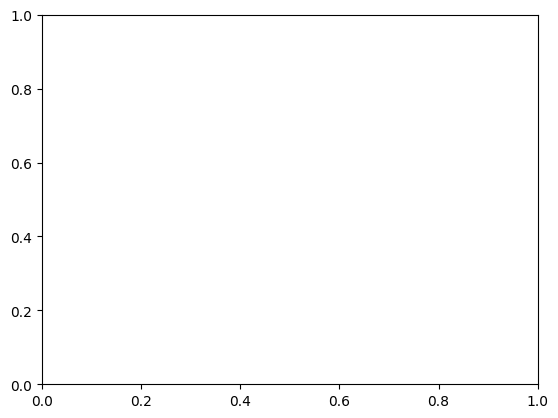

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
actogram(..., axes=ax1)
plt.show()